#  Importing Libraries

In [ ]:
!pip install sentence_transformers

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout,Bidirectional,Layer
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import keras.utils
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Reshape, Dropout
from tensorflow.keras import Model
import csv
from sentence_transformers import SentenceTransformer
import re
import pickle


# Reading Data

In [ ]:
'''df = pd.read_csv('/Users/datta/tokhinglish/fakebalance.csv')
df2 = pd.read_csv('/Users/datta/tokhinglish/hatebalance.csv')
df3 = pd.read_csv('/Users/datta/tokhinglish/N_Sentiment.csv')'''

df = pd.read_csv('fakebalance.csv')
df2 = pd.read_csv('hatebalance.csv')
df3 = pd.read_csv('N_Sentiment.csv')



# **Preprocessing Data**

In [ ]:
def preprocess_text_data(df):
  replace_by_space = re.compile('[/(){}\[\]\|@,;]')
  bad_sym = re.compile('[^a-z #+_]')
  def clean_text(text):
    text = text.lower()
    text = replace_by_space.sub(' ',text)
    text = bad_sym.sub('', text)
    return text
  df.dropna(subset = ['text'], inplace = True)
  df['text'] = df['text'].apply(clean_text)

In [ ]:
df11=df
df22=df2
df33=df3

In [ ]:
df


,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,bhaarata ke videsha ma.mtraalaya paakistaa raa...,0
1,1,1,bihaara taarakishora prasaada biijepa vidhaaya...,0
2,2,2,buuma paaya piiema moda apa kariiba sahaya aar...,1
3,3,3,buuma paaya tasviira chaara saala puraa thaaii...,1
4,4,4,buuma paड़taala saama aaya vaayarala tasviira j...,1
...,...,...,...,...
2005,2005,2006,bihaara vidhaanasabha chunaava ke natiija aa c...,0
2006,2006,2007,buuma paaya pradhaanama.mtra aayuShmaana bhaar...,1
2007,2007,2008,buuma viiTa balaraama pradarshana ghaayala pro...,1
2008,2008,2009,soshala miiDiya shahiida pat ke shoka mana vii...,1


In [ ]:
df2

,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0
1,1,1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0
2,2,2,Doctor sab sahi me ke PhD (in hate politics) ...,0
3,3,3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0
4,4,4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1
...,...,...,...,...
4574,4574,4574,ye attankwadi Indian agent hai jo terrorism ph...,0
4575,4575,4575,bola na terrorism ko support karna band karoge...,0
4576,4576,4576,lagta hai aap ne movie dekhi hai which is writ...,0
4577,4577,4577,tum log terrorism ko support karna band kardo ...,0


In [ ]:
df33

,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,Love u sir love u soo much urs I'ts beautyful ...,0
1,1,1,Arae sur jee pahelae hamare bharat ke bachho k...,1
2,2,2,Wah! Jitni sundar geet ke bhao hain utnihi sun...,0
3,3,3,Sundar ekdam sahi Gaya Hua gana.chhotisi gudiy...,0
4,4,4,Wao lata mangekar,0
...,...,...,...,...
3873,3873,3873,Cool movie bajarangi bhaijan osm ??,0
3874,3874,3874,Salman sahab aap to meri aawaj sunenge nahi.Ph...,1
3875,3875,3875,sir aap dil jeet liya kya movie ti,0
3876,3876,3876,Salman sir bahot acchi movie hai super hit blo...,0


In [ ]:
preprocess_text_data(df11)

In [ ]:
df11

,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,bhaarata ke videsha mamtraalaya paakistaa raaj...,0
1,1,1,bihaara taarakishora prasaada biijepa vidhaaya...,0
2,2,2,buuma paaya piiema moda apa kariiba sahaya aar...,1
3,3,3,buuma paaya tasviira chaara saala puraa thaaii...,1
4,4,4,buuma pataala saama aaya vaayarala tasviira ju...,1
...,...,...,...,...
2005,2005,2006,bihaara vidhaanasabha chunaava ke natiija aa c...,0
2006,2006,2007,buuma paaya pradhaanamamtra aayushmaana bhaara...,1
2007,2007,2008,buuma viita balaraama pradarshana ghaayala pro...,1
2008,2008,2009,soshala miidiya shahiida pat ke shoka mana vii...,1


In [ ]:
preprocess_text_data(df22)
df22

,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,knowing ki vikas kitna samjhata hai priyanka a...,0
1,1,1,i am muhajir aur mere lye sab se pehly pakist...,0
2,2,2,doctor sab sahi me ke phd in hate politics ...,0
3,3,3,poore desh me patel obc me aate hain sirf gujr...,0
4,4,4,sarkar banne ke bad hindu hit me ek bhi faisla...,1
...,...,...,...,...
4574,4574,4574,ye attankwadi indian agent hai jo terrorism ph...,0
4575,4575,4575,bola na terrorism ko support karna band karoge...,0
4576,4576,4576,lagta hai aap ne movie dekhi hai which is writ...,0
4577,4577,4577,tum log terrorism ko support karna band kardo ...,0


In [ ]:
preprocess_text_data(df33)
df33

,Unnamed: 0,Unnamed: 0.1,text,label
0,0,0,love u sir love u soo much urs its beautyful v...,0
1,1,1,arae sur jee pahelae hamare bharat ke bachho k...,1
2,2,2,wah jitni sundar geet ke bhao hain utnihi sund...,0
3,3,3,sundar ekdam sahi gaya hua ganachhotisi gudiya...,0
4,4,4,wao lata mangekar,0
...,...,...,...,...
3873,3873,3873,cool movie bajarangi bhaijan osm,0
3874,3874,3874,salman sahab aap to meri aawaj sunenge nahiphi...,1
3875,3875,3875,sir aap dil jeet liya kya movie ti,0
3876,3876,3876,salman sir bahot acchi movie hai super hit blo...,0


# **Embeddings Function**




In [ ]:
def get_embeddings(df):
    sentences = list(df['text'])
    model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')
    embeddings = model.encode(sentences)
    model = SentenceTransformer('bert-base-multilingual-cased')
    embeddingss = model.encode(sentences)
    y=np.add(embeddings,embeddingss)
    y2=np.divide(y,2)
    return embeddings,embeddingss,y2

# Fake dataset 

In [ ]:
embeddings_f_xlm,embeddings_f_bert_multilingual,y2 = get_embeddings(df11)

Some weights of the model checkpoint at C:\Users\datta/.cache\torch\sentence_transformers\bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(y2)

[[ 0.17789796  0.2537169   0.21907021 ...  0.09726407 -0.17089191
  -0.26382822]
 [-0.03751533  0.2851254  -0.47564825 ...  0.18481928 -0.37222978
  -0.3442329 ]
 [ 0.08561344  0.09568948  0.27458692 ...  0.17875181 -0.2734588
  -0.25619233]
 ...
 [ 0.13852444 -0.01964221  0.19472894 ... -0.0549511  -0.36711907
  -0.26144755]
 [-0.15364793  0.30689168  0.23618123 ...  0.02612023 -0.29987103
  -0.18834257]
 [ 0.25283945  0.17887166  0.1333012  ...  0.3461372  -0.28202963
  -0.300924  ]]


In [ ]:
embeddings_f_xlm.shape

(2010, 768)

In [ ]:
embeddings_f_bert_multilingual.shape

(2010, 768)

In [ ]:
import pickle
pickle.dump(y2, open('embeddings_fake.pkl', 'wb'))

In [ ]:
y2 = pd.read_pickle('embeddings_fake.pkl')

# Hate dataset

In [ ]:
embeddings_h_xlm,embeddings_h_bert_multilingual,y4 = get_embeddings(df22)

Some weights of the model checkpoint at C:\Users\datta/.cache\torch\sentence_transformers\bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(y4)

[[ 0.06400979  0.20470333  0.2521961  ...  0.5587935  -0.4755863
   0.02482317]
 [-0.06680676  0.24154751 -0.02710779 ...  0.19772151  0.02591038
  -0.22637121]
 [-0.01581421  0.1400761   0.22038038 ...  0.10757218  0.23815031
   0.10385062]
 ...
 [ 0.12110088  0.09242626 -0.0788901  ...  0.15743876  0.02549186
   0.19410111]
 [-0.04858191 -0.16248158 -0.00212979 ...  0.04673702 -0.07847194
  -0.23489231]
 [-0.06592418  0.24440694  0.18030801 ...  0.2990996   0.0250844
   0.15308124]]


In [ ]:
embeddings_h_xlm.shape

(4578, 768)

In [ ]:
embeddings_h_bert_multilingual.shape

(4578, 768)

In [ ]:
import pickle
pickle.dump(y4, open('embeddings_hate.pkl', 'wb'))

In [ ]:
y4 = pd.read_pickle('embeddings_hate.pkl')

# Sentiment Dataset

In [ ]:
embeddings_s_xlm,embeddings_s_bert_multilingual,y6 = get_embeddings(df33)

Some weights of the model checkpoint at C:\Users\datta/.cache\torch\sentence_transformers\bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(y6)

[[-0.11805969  0.3999326   0.7376689  ...  0.04067279 -0.24806601
   0.4342809 ]
 [ 0.069061    0.447065    0.3120293  ...  0.19551902  0.05977853
  -0.16268626]
 [ 0.12285742  0.45143783  0.1258015  ...  0.35466897 -0.05840959
  -0.14113061]
 ...
 [ 0.34819487  0.32511967  0.46068937 ...  0.2553258   0.00550327
   0.04468854]
 [ 0.13405886  0.09082325  0.5589966  ...  0.5592401  -0.10438363
  -0.23490918]
 [ 0.00615087 -0.12506722  0.6543495  ...  0.49437398  0.03860886
  -0.3361882 ]]


In [ ]:
embeddings_s_xlm.shape

(3878, 768)

In [ ]:
embeddings_s_bert_multilingual.shape

(3878, 768)

In [ ]:
y6.shape

(3878, 768)

In [ ]:
pickle.dump(y6, open('embeddings_senti.pkl', 'wb'))

In [ ]:
y6 = pd.read_pickle('embeddings_senti.pkl')

In [ ]:
l1=pd.get_dummies(df11['label']).values

In [ ]:
l2=pd.get_dummies(df22['label']).values

In [ ]:
l3=pd.get_dummies(df33['label']).values

# Model and Embeddings Size Reduction

In [ ]:
def lstm_model(val,x,y,x1,x2,loss,d,cmap):
    if val == 1:
        print("Fake Model")
    elif val == 2:
        print("Hate Model")
    else:
        print("Sentiment Model")
        
    #Embeddings Size Reduction    
    print("Embeddings Size Reduction")
    encoding_dim = 200
    ncol = x.shape[1]
    input_dim = Input(shape = (ncol, ))

    # Encoder Layers
    encoded1 = Dense(768, activation = 'relu')(input_dim)
    encoded2 = Dense(512, activation = 'relu')(encoded1)
    encoded3 = Dense(256, activation = 'relu')(encoded2)
    encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)

    # Decoder Layers
    decoded1 = Dense(256, activation = 'relu')(encoded4)
    decoded2 = Dense(512, activation = 'relu')(decoded1)
    decoded3 = Dense(768, activation = 'relu')(decoded2)
    decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)

    # Combine Encoder and Deocder layers
    autoencoder = Model(inputs = input_dim, outputs = decoded4)

    # Compile the Model
    autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
    autoencoder.summary()
    
    autoencoder.fit(x, x,epochs = 5, batch_size = 32, shuffle = False, validation_data = (x,x))
    encoder = Model(inputs = input_dim, outputs = encoded4)
    encoded_input = Input(shape = (encoding_dim, ))
    ye = pd.DataFrame(encoder.predict(x))
    print(ye.shape)
    ye.head()
    yen = ye.to_numpy()
    yen.shape
    yen = np.reshape(yen,(yen.shape[0], 1, yen.shape[1]))
    yen.shape
    
    #lstm_model 
    print("LSTM Model")
    x_train, x_test, y_train, y_test = train_test_split(yen,y, test_size=0.1, random_state= 41)
    model = Sequential()
    model.add(LSTM(200,input_shape=(1,200),return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(128, return_sequences=False,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(d, activation='softmax'))
    model.compile(loss=loss, optimizer = 'adam', metrics = ['accuracy'])
    model.summary()
    
    #Training 
    
    history = model.fit(x_train,y_train, epochs=40, batch_size=128, validation_split=0.2)
    y_generated = model.predict(x_test)
    y_generated
    y=y_generated.argmax(axis=1)
    y_test=y_test.argmax(axis=1)
    y_test
    
    print(classification_report(y_test, y,target_names=['0','1']))
    
    cm = confusion_matrix(y_test,y,labels=[0,1])
    cm_df = pd.DataFrame(cm,index = ['0','1'],
                     columns = ['0','1'])
    plt.figure(figsize=(20,10))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap)
    plt.title('lstm_model:{0:.3f}'.format(accuracy_score(y_test,y)))
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    
    
    y1 = pd.DataFrame(encoder.predict(x1))
    y2 = pd.DataFrame(encoder.predict(x2))
    print(y1.shape)
    y1.head()
    print(y2.shape)
    y2.head()
    yen1 = y1.to_numpy()
    yen2 = y2.to_numpy()
    yen1 = np.reshape(yen1,(yen1.shape[0], 1, yen1.shape[1]))
    yen2 = np.reshape(yen2,(yen2.shape[0], 1, yen2.shape[1]))
    print(yen1.shape)
    print(yen2.shape)
    y_generated1 = model.predict(yen1)
    y_generated2 = model.predict(yen2)
    y_generated1
    y_generated2
    y_1=y_generated1.argmax(axis=1)
    y_2=y_generated2.argmax(axis=1)
    y_1 = list(y_1)
    y_2 = list(y_2)
    return y_1,y_2

#  Fake

Fake Model
Embeddings Size Reduction
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 768)]             0         
                                                                 
 dense_80 (Dense)            (None, 768)               590592    
                                                                 
 dense_81 (Dense)            (None, 512)               393728    
                                                                 
 dense_82 (Dense)            (None, 256)               131328    
                                                                 
 dense_83 (Dense)            (None, 200)               51400     
                                                                 
 dense_84 (Dense)            (None, 256)               51456     
                                                                 
 dense_85 (Dense)    

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_16 (Dropout)        (None, 1, 200)            0         
                                                                 
 lstm_17 (LSTM)              (None, 128)               168448    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_88 (Dense)            (None, 2)                 258       
                                                                 
Total params: 489,506
Trainable params: 489,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
12/12 [==============================

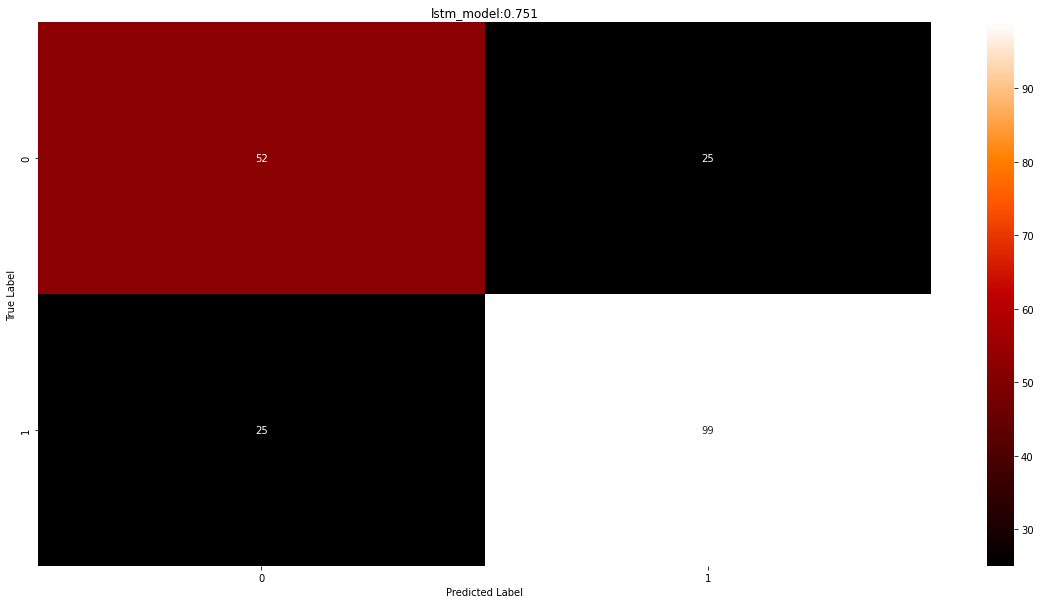

(4578, 200)
(3878, 200)
(4578, 1, 200)
(3878, 1, 200)


In [ ]:
y_fh,y_fs=lstm_model(1,y2,l1,y4,y6,"binary_crossentropy",2,'gist_heat')

#  Hate

Hate Model
Embeddings Size Reduction
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 768)]             0         
                                                                 
 dense_89 (Dense)            (None, 768)               590592    
                                                                 
 dense_90 (Dense)            (None, 512)               393728    
                                                                 
 dense_91 (Dense)            (None, 256)               131328    
                                                                 
 dense_92 (Dense)            (None, 200)               51400     
                                                                 
 dense_93 (Dense)            (None, 256)               51456     
                                                                 
 dense_94 (Dense)    

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_18 (Dropout)        (None, 1, 200)            0         
                                                                 
 lstm_19 (LSTM)              (None, 128)               168448    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_97 (Dense)            (None, 2)                 258       
                                                                 
Total params: 489,506
Trainable params: 489,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
26/26 [==============================

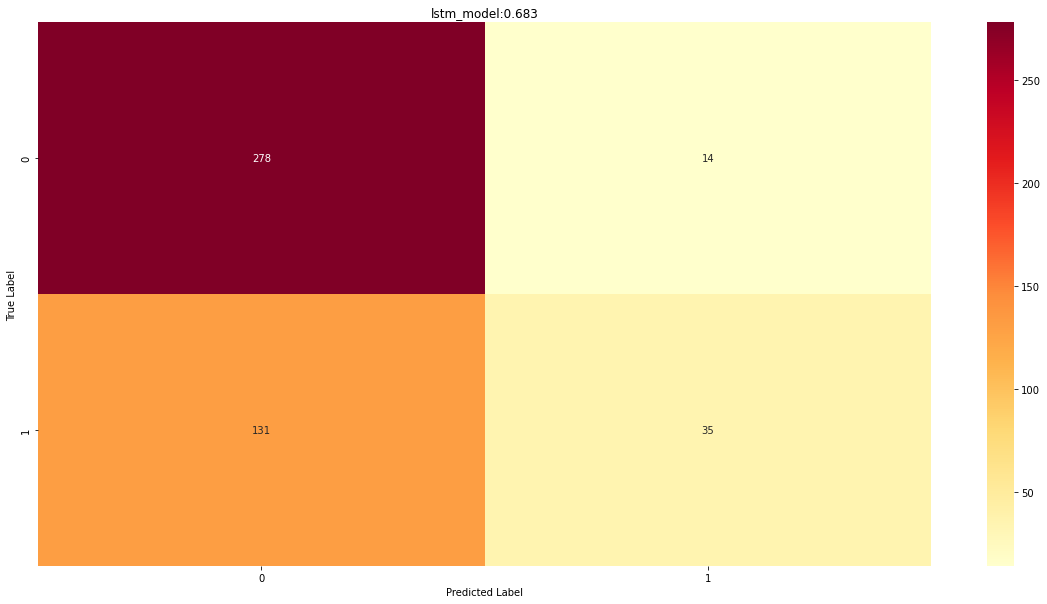

(2010, 200)
(3878, 200)
(2010, 1, 200)
(3878, 1, 200)


In [ ]:
y_hf,y_hs=lstm_model(2,y4,l2,y2,y6,"binary_crossentropy",2,'YlOrRd')

#  Sentiment

Sentiment Model
Embeddings Size Reduction
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 768)]             0         
                                                                 
 dense_98 (Dense)            (None, 768)               590592    
                                                                 
 dense_99 (Dense)            (None, 512)               393728    
                                                                 
 dense_100 (Dense)           (None, 256)               131328    
                                                                 
 dense_101 (Dense)           (None, 200)               51400     
                                                                 
 dense_102 (Dense)           (None, 256)               51456     
                                                                 
 dense_103 (Dens

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_20 (Dropout)        (None, 1, 200)            0         
                                                                 
 lstm_21 (LSTM)              (None, 128)               168448    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_106 (Dense)           (None, 2)                 258       
                                                                 
Total params: 489,506
Trainable params: 489,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
22/22 [=============================

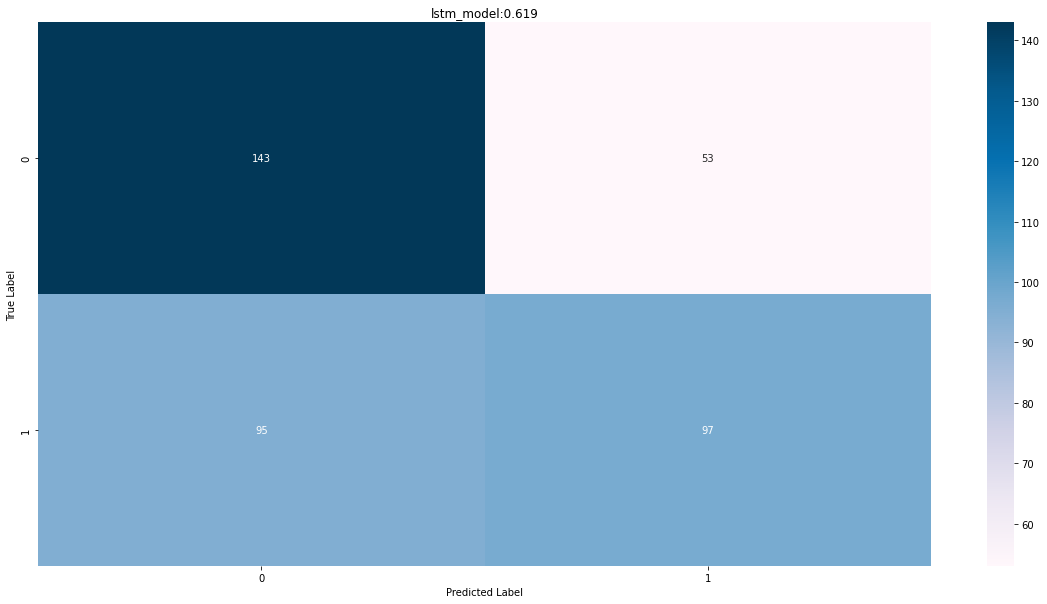

(2010, 200)
(4578, 200)
(2010, 1, 200)
(4578, 1, 200)


In [ ]:
y_sf,y_sh=lstm_model(3,y6,l3,y2,y4,"binary_crossentropy",2,'PuBu')

#  Creating Pseudo Labels

In [ ]:
df = df.rename(columns = {"label":"label_f"})
df2 = df2.rename(columns = {"label":"label_h"})
df3 = df3.rename(columns = {"label":"label_s"})


In [ ]:
df['label_h'] = y_hf
df['label_s'] = y_sf
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df2['label_f'] = y_fh
df2['label_s'] = y_sh
df2=df2.loc[:, ~df2.columns.str.match('Unnamed')]
df3['label_f'] = y_fs
df3['label_h'] = y_hs
df3=df3.loc[:, ~df3.columns.str.match('Unnamed')]

In [ ]:
df

,text,label_f,label_h,label_s
0,bhaarata ke videsha mamtraalaya paakistaa raaj...,0,0,1
1,bihaara taarakishora prasaada biijepa vidhaaya...,0,0,0
2,buuma paaya piiema moda apa kariiba sahaya aar...,1,0,1
3,buuma paaya tasviira chaara saala puraa thaaii...,1,0,0
4,buuma pataala saama aaya vaayarala tasviira ju...,1,0,0
...,...,...,...,...
2005,bihaara vidhaanasabha chunaava ke natiija aa c...,0,0,0
2006,buuma paaya pradhaanamamtra aayushmaana bhaara...,1,0,1
2007,buuma viita balaraama pradarshana ghaayala pro...,1,0,0
2008,soshala miidiya shahiida pat ke shoka mana vii...,1,0,0


In [ ]:
df2

,text,label_h,label_f,label_s
0,knowing ki vikas kitna samjhata hai priyanka a...,0,1,0
1,i am muhajir aur mere lye sab se pehly pakist...,0,1,0
2,doctor sab sahi me ke phd in hate politics ...,0,0,1
3,poore desh me patel obc me aate hain sirf gujr...,0,1,0
4,sarkar banne ke bad hindu hit me ek bhi faisla...,1,1,0
...,...,...,...,...
4574,ye attankwadi indian agent hai jo terrorism ph...,0,1,0
4575,bola na terrorism ko support karna band karoge...,0,0,1
4576,lagta hai aap ne movie dekhi hai which is writ...,0,1,1
4577,tum log terrorism ko support karna band kardo ...,0,1,1


In [ ]:
df3

,text,label_s,label_f,label_h
0,love u sir love u soo much urs its beautyful v...,0,1,0
1,arae sur jee pahelae hamare bharat ke bachho k...,1,0,0
2,wah jitni sundar geet ke bhao hain utnihi sund...,0,1,0
3,sundar ekdam sahi gaya hua ganachhotisi gudiya...,0,0,0
4,wao lata mangekar,0,1,0
...,...,...,...,...
3873,cool movie bajarangi bhaijan osm,0,1,0
3874,salman sahab aap to meri aawaj sunenge nahiphi...,1,0,0
3875,sir aap dil jeet liya kya movie ti,0,1,0
3876,salman sir bahot acchi movie hai super hit blo...,0,1,0


In [ ]:
df.to_csv('psuedo_Fake.csv')
df2.to_csv('psuedo_Hate.csv')
df3.to_csv('psuedo_Sentiment.csv')

In [ ]:
df

,text,label_f,label_h,label_s
0,bhaarata ke videsha mamtraalaya paakistaa raaj...,0,0,1
1,bihaara taarakishora prasaada biijepa vidhaaya...,0,0,0
2,buuma paaya piiema moda apa kariiba sahaya aar...,1,0,1
3,buuma paaya tasviira chaara saala puraa thaaii...,1,0,0
4,buuma pataala saama aaya vaayarala tasviira ju...,1,0,0
...,...,...,...,...
2005,bihaara vidhaanasabha chunaava ke natiija aa c...,0,0,0
2006,buuma paaya pradhaanamamtra aayushmaana bhaara...,1,0,1
2007,buuma viita balaraama pradarshana ghaayala pro...,1,0,0
2008,soshala miidiya shahiida pat ke shoka mana vii...,1,0,0


In [ ]:
'''df = pd.read_csv('/Users/datta/tokhinglish/psuedo_Fake.csv')
df2 = pd.read_csv('/Users/datta/tokhinglish/psuedo_Hate.csv')
df3 = pd.read_csv('/Users/datta/tokhinglish/psuedo_Sentiment.csv')'''

df = pd.read_csv('psuedo_Fake.csv')
df2 = pd.read_csv('psuedo_Hate.csv')
df3 = pd.read_csv('psuedo_Sentiment.csv')

In [ ]:
df = df[['text','label_f','label_h','label_s']]
df

,text,label_f,label_h,label_s
0,bhaarata ke videsha mamtraalaya paakistaa raaj...,0,0,1
1,bihaara taarakishora prasaada biijepa vidhaaya...,0,0,0
2,buuma paaya piiema moda apa kariiba sahaya aar...,1,0,1
3,buuma paaya tasviira chaara saala puraa thaaii...,1,0,0
4,buuma pataala saama aaya vaayarala tasviira ju...,1,0,0
...,...,...,...,...
2005,bihaara vidhaanasabha chunaava ke natiija aa c...,0,0,0
2006,buuma paaya pradhaanamamtra aayushmaana bhaara...,1,0,1
2007,buuma viita balaraama pradarshana ghaayala pro...,1,0,0
2008,soshala miidiya shahiida pat ke shoka mana vii...,1,0,0


In [ ]:
df2 = df2[['text','label_f','label_h','label_s']]
df2

,text,label_f,label_h,label_s
0,knowing ki vikas kitna samjhata hai priyanka a...,1,0,0
1,i am muhajir aur mere lye sab se pehly pakist...,1,0,0
2,doctor sab sahi me ke phd in hate politics ...,0,0,1
3,poore desh me patel obc me aate hain sirf gujr...,1,0,0
4,sarkar banne ke bad hindu hit me ek bhi faisla...,1,1,0
...,...,...,...,...
4573,ye attankwadi indian agent hai jo terrorism ph...,1,0,0
4574,bola na terrorism ko support karna band karoge...,0,0,1
4575,lagta hai aap ne movie dekhi hai which is writ...,1,0,1
4576,tum log terrorism ko support karna band kardo ...,1,0,1


In [ ]:
df3 = df3[['text','label_f','label_h','label_s']]
df3

,text,label_f,label_h,label_s
0,love u sir love u soo much urs its beautyful v...,1,0,0
1,arae sur jee pahelae hamare bharat ke bachho k...,0,0,1
2,wah jitni sundar geet ke bhao hain utnihi sund...,1,0,0
3,sundar ekdam sahi gaya hua ganachhotisi gudiya...,0,0,0
4,wao lata mangekar,1,0,0
...,...,...,...,...
3873,cool movie bajarangi bhaijan osm,1,0,0
3874,salman sahab aap to meri aawaj sunenge nahiphi...,0,0,1
3875,sir aap dil jeet liya kya movie ti,1,0,0
3876,salman sir bahot acchi movie hai super hit blo...,1,0,0


In [ ]:
df = df.append(df2)

In [ ]:
df=df.append(df3)

In [ ]:
df = df.sample(frac=1)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,text,label_f,label_h,label_s
2745,sir lovehate relationship ke bare mein aap ka...,1,0,0
2773,same here he is the reason to watch bb but i c...,0,0,0
959,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
955,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4036,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
1554,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
634,masti he mohl me chahi khumari he saarey thak ...,0,0,0
970,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
2929,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1


In [ ]:
df.to_csv('psuedo_data.csv')

In [ ]:
'''df = pd.read_csv('/Users/datta/tokhinglish/psuedo_data.csv')'''
df = pd.read_csv('psuedo_data.csv')

In [ ]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df

,text,label_f,label_h,label_s
0,sir lovehate relationship ke bare mein aap ka...,1,0,0
1,same here he is the reason to watch bb but i c...,0,0,0
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1


In [ ]:
df

,text,label_f,label_h,label_s
0,sir lovehate relationship ke bare mein aap ka...,1,0,0
1,same here he is the reason to watch bb but i c...,0,0,0
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1
